## Estimation of obesity levels based on eating habits and physical condition Data Set
https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+

**Attribute Information:**

Attributes related with eating habits are:
Frequent consumption of high caloric food (FAVC),

Frequency of consumption of vegetables (FCVC),

Number of main meals (NCP),

Consumption of food between meals (CAEC),

Consumption of water daily (CH20),

and Consumption of alcohol (CALC).

Attributes related with the physical condition are:
Calories consumption monitoring (SCC),

Physical activity frequency (FAF),

Time using technology devices (TUE),

Transportation used (MTRANS),

Other variables were:
Gender, Age, Height and Weight.

Finally, all data was labeled and the class variable NObesity was created with the values of: Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III, based on Equation (1) and information from WHO and Mexican Normativity.

The data contains numerical data and continous data, so it can be used for analysis based on algorithms of classification, prediction, segmentation and association. Data is available in CSV format and ARFF format to be used with the Weka tool.https://www.sciencedirect.com/science/article/pii/S2352340919306985

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('./ObesityDataSet_raw_and_data_sinthetic.CSV')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df['bmi'] = df.Weight/(df.Height**2)

In [4]:
df.shape

(2111, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.000000,19.947192,22.777890,26.000000,61.000000
Height,2111.0,1.701677,0.093305,1.450000,1.630000,1.700499,1.768464,1.980000
Weight,2111.0,86.586058,26.191172,39.000000,65.473343,83.000000,107.430682,173.000000
FCVC,2111.0,2.419043,0.533927,1.000000,2.000000,2.385502,3.000000,3.000000
NCP,2111.0,2.685628,0.778039,1.000000,2.658738,3.000000,3.000000,4.000000
CH2O,2111.0,2.008011,0.612953,1.000000,1.584812,2.000000,2.477420,3.000000
FAF,2111.0,1.010298,0.850592,0.000000,0.124505,1.000000,1.666678,3.000000
TUE,2111.0,0.657866,0.608927,0.000000,0.000000,0.625350,1.000000,2.000000
bmi,2111.0,29.700159,8.011337,12.998685,24.325802,28.719089,36.016501,50.811753


## 1. Xác định các thuộc tính
**a. Input:** <br>
**b. Output:** <br>
**c. Data type:** <br>
* Numeric<br>
* String<br>


In [7]:
# Quanlitative data: dữ liệu kiểu số
numbers = [f for f in df.columns if df.dtypes[f] != 'object'] 
list_nums = ', '.join(numbers)
list_nums

'Age, Height, Weight, FCVC, NCP, CH2O, FAF, TUE, bmi'

In [8]:
# Qualitative data: dữ liệu kiểu chuỗi
objects = [f for f in df.columns if df.dtypes[f] == 'object'] 
list_obj = ', '.join(objects)
list_obj

'Gender, family_history_with_overweight, FAVC, CAEC, SMOKE, SCC, CALC, MTRANS, NObeyesdad'

**d. Variable Category:**<br>
* Categorical: kiểu số, kiểu chuỗi<br>
* Continuous: kiểu int, kiểu float

In [9]:
# Xem xét các biến phân loại kiểu chuỗi
# Categorical
i = 1
for obj in objects:
    print(i, '.', obj.ljust(15), '\t', len(df[obj].unique()), ":", df[obj].unique())
    i += 1

1 . Gender          	 2 : ['Female' 'Male']
2 . family_history_with_overweight 	 2 : ['yes' 'no']
3 . FAVC            	 2 : ['no' 'yes']
4 . CAEC            	 4 : ['Sometimes' 'Frequently' 'Always' 'no']
5 . SMOKE           	 2 : ['no' 'yes']
6 . SCC             	 2 : ['no' 'yes']
7 . CALC            	 4 : ['no' 'Sometimes' 'Frequently' 'Always']
8 . MTRANS          	 5 : ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
9 . NObeyesdad      	 7 : ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [10]:
# Categorical & Continuous:
i = 1
for obj in numbers:
    print(i, '.', obj.ljust(15), '\t', len(df[obj].unique()), ":", df[obj].unique() if len(df[obj].unique()) < 150 else "")
    i += 1

1 . Age             	 1402 : 
2 . Height          	 1574 : 
3 . Weight          	 1525 : 
4 . FCVC            	 810 : 
5 . NCP             	 635 : 
6 . CH2O            	 1268 : 
7 . FAF             	 1190 : 
8 . TUE             	 1129 : 
9 . bmi             	 1968 : 


In [11]:
# drop các cột không cần thiết:
# lst = ['vendor_name', 'model_name']
# df = df.drop(lst, axis = 1)
# df.head()

## 2. Phân tích đơn biến Univariate Analysis

### Continuous variable:


In [12]:
def cont_var(data):
    # Provide info to continuous univariable

    # Basic statistical info:
    print('\n============================= Variable %s: ==============================' %data.name)
    print('Central Tendency:')
    print(data.describe())
    print('Mean:', data.mean())
    print('Mode:', data.mode()[0])
    print('Median:', data.median())
    print('\nMeasure of dispersion:')
    print('Range:', np.ptp(data)) # range = max-min
    quartile = np.array([0.25,0.50,0.75]) # seperate data by 3 points
    lst = []
    for i in quartile:
        lst.append(data.quantile(i).tolist())
    print('Quartile Q1, Q2, Q3:', lst)
    print('IQR = Q3 - Q1 = ',stats.iqr(data))
    print('Variance: %.2f' %np.var(data))   
    print('Standard Deviation: %.2f' %np.std(data))
    print('Skewness: %.2f' %stats.skew(data))  
    print('Kurtosis: %.2f' %stats.kurtosis(data))
    
        
    # Visualizing continuous data  
    plt.figure(figsize=(14,6))
    plt.subplot(1,3,1)
    sns.distplot(data)
    plt.subplot(1,3,2)
    plt.hist(data)
    plt.subplot(1,3,3)
    plt.boxplot(data)
    plt.show()



============================= Variable Age: ==============================
Central Tendency:
count    2111.000000
mean       24.312600
std         6.345968
min        14.000000
25%        19.947192
50%        22.777890
75%        26.000000
max        61.000000
Name: Age, dtype: float64
Mean: 24.312599908574136
Mode: 18.0
Median: 22.77789

Measure of dispersion:
Range: 47.0
Quartile Q1, Q2, Q3: [19.947192, 22.77789, 26.0]
IQR = Q3 - Q1 =  6.052807999999999
Variance: 40.25
Standard Deviation: 6.34
Skewness: 1.53
Kurtosis: 2.82


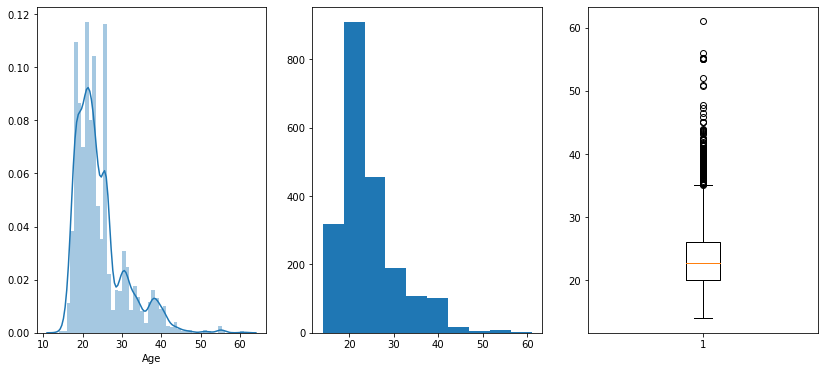


============================= Variable Height: ==============================
Central Tendency:
count    2111.000000
mean        1.701677
std         0.093305
min         1.450000
25%         1.630000
50%         1.700499
75%         1.768464
max         1.980000
Name: Height, dtype: float64
Mean: 1.7016773533870204
Mode: 1.7
Median: 1.7004990000000002

Measure of dispersion:
Range: 0.53
Quartile Q1, Q2, Q3: [1.63, 1.7004990000000002, 1.7684639999999998]
IQR = Q3 - Q1 =  0.13846399999999992
Variance: 0.01
Standard Deviation: 0.09
Skewness: -0.01
Kurtosis: -0.56


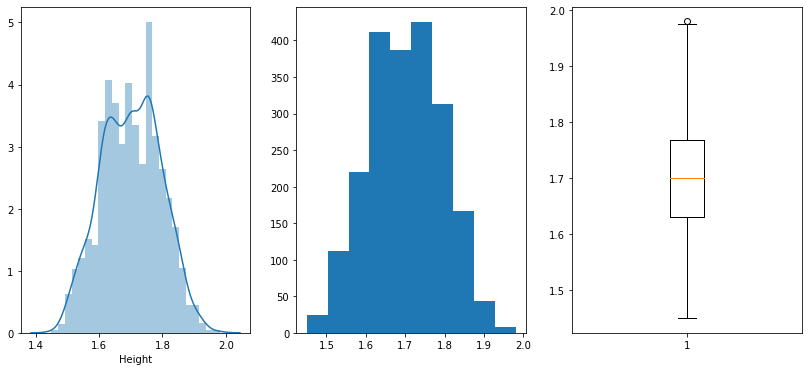


============================= Variable Weight: ==============================
Central Tendency:
count    2111.000000
mean       86.586058
std        26.191172
min        39.000000
25%        65.473343
50%        83.000000
75%       107.430682
max       173.000000
Name: Weight, dtype: float64
Mean: 86.58605812648035
Mode: 80.0
Median: 83.0

Measure of dispersion:
Range: 134.0
Quartile Q1, Q2, Q3: [65.473343, 83.0, 107.430682]
IQR = Q3 - Q1 =  41.957339000000005
Variance: 685.65
Standard Deviation: 26.18
Skewness: 0.26
Kurtosis: -0.70


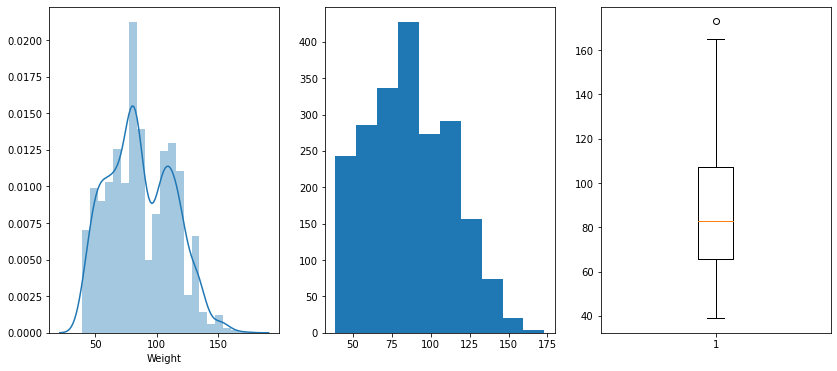


============================= Variable FCVC: ==============================
Central Tendency:
count    2111.000000
mean        2.419043
std         0.533927
min         1.000000
25%         2.000000
50%         2.385502
75%         3.000000
max         3.000000
Name: FCVC, dtype: float64
Mean: 2.4190430615821885
Mode: 3.0
Median: 2.3855020000000002

Measure of dispersion:
Range: 2.0
Quartile Q1, Q2, Q3: [2.0, 2.3855020000000002, 3.0]
IQR = Q3 - Q1 =  1.0
Variance: 0.28
Standard Deviation: 0.53
Skewness: -0.43
Kurtosis: -0.64


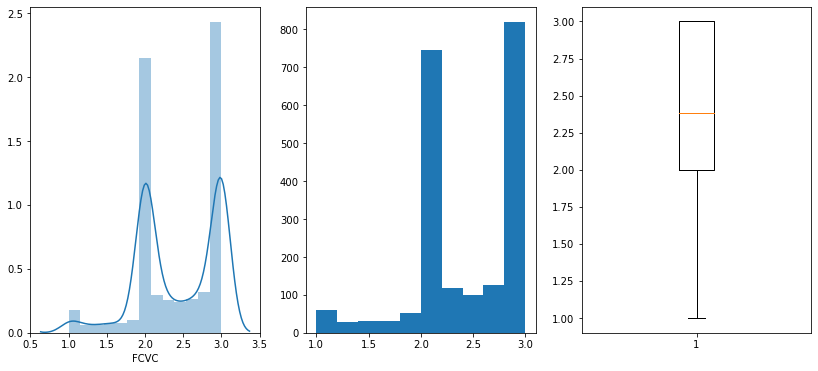


============================= Variable NCP: ==============================
Central Tendency:
count    2111.000000
mean        2.685628
std         0.778039
min         1.000000
25%         2.658738
50%         3.000000
75%         3.000000
max         4.000000
Name: NCP, dtype: float64
Mean: 2.6856280497394596
Mode: 3.0
Median: 3.0

Measure of dispersion:
Range: 3.0
Quartile Q1, Q2, Q3: [2.658738, 3.0, 3.0]
IQR = Q3 - Q1 =  0.34126199999999995
Variance: 0.61
Standard Deviation: 0.78
Skewness: -1.11
Kurtosis: 0.38


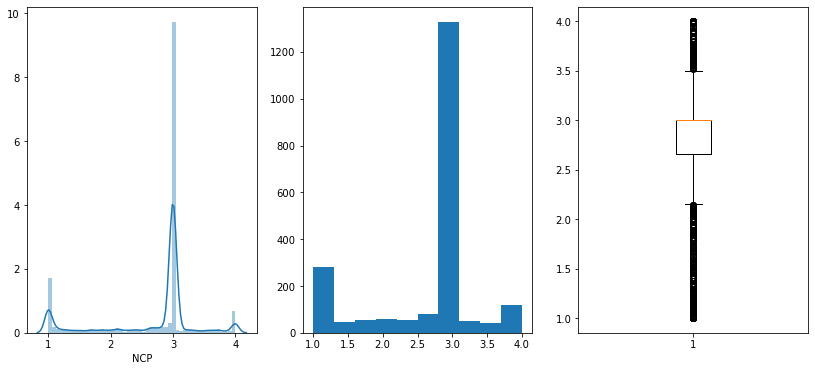


============================= Variable CH2O: ==============================
Central Tendency:
count    2111.000000
mean        2.008011
std         0.612953
min         1.000000
25%         1.584812
50%         2.000000
75%         2.477420
max         3.000000
Name: CH2O, dtype: float64
Mean: 2.0080114040738986
Mode: 2.0
Median: 2.0

Measure of dispersion:
Range: 2.0
Quartile Q1, Q2, Q3: [1.5848125, 2.0, 2.4774200000000004]
IQR = Q3 - Q1 =  0.8926075000000004
Variance: 0.38
Standard Deviation: 0.61
Skewness: -0.10
Kurtosis: -0.88


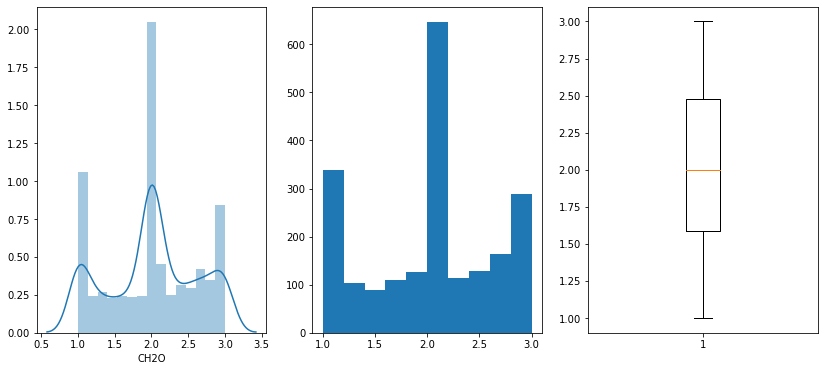


============================= Variable FAF: ==============================
Central Tendency:
count    2111.000000
mean        1.010298
std         0.850592
min         0.000000
25%         0.124505
50%         1.000000
75%         1.666678
max         3.000000
Name: FAF, dtype: float64
Mean: 1.0102976958787304
Mode: 0.0
Median: 1.0

Measure of dispersion:
Range: 3.0
Quartile Q1, Q2, Q3: [0.124505, 1.0, 1.6666775]
IQR = Q3 - Q1 =  1.5421725
Variance: 0.72
Standard Deviation: 0.85
Skewness: 0.50
Kurtosis: -0.62


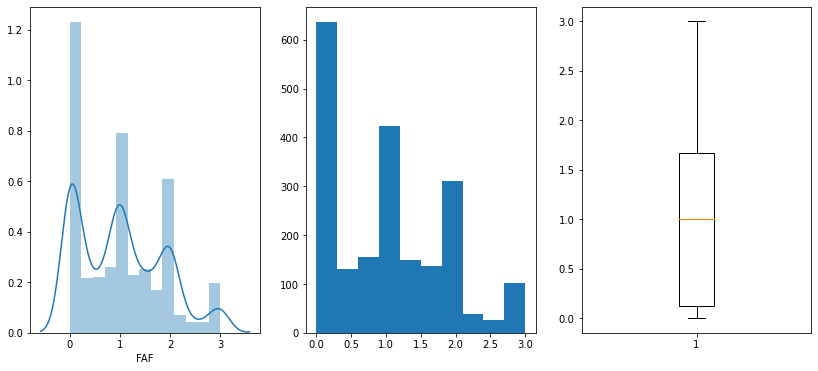


============================= Variable TUE: ==============================
Central Tendency:
count    2111.000000
mean        0.657866
std         0.608927
min         0.000000
25%         0.000000
50%         0.625350
75%         1.000000
max         2.000000
Name: TUE, dtype: float64
Mean: 0.657865923732828
Mode: 0.0
Median: 0.62535

Measure of dispersion:
Range: 2.0
Quartile Q1, Q2, Q3: [0.0, 0.62535, 1.0]
IQR = Q3 - Q1 =  1.0
Variance: 0.37
Standard Deviation: 0.61
Skewness: 0.62
Kurtosis: -0.55


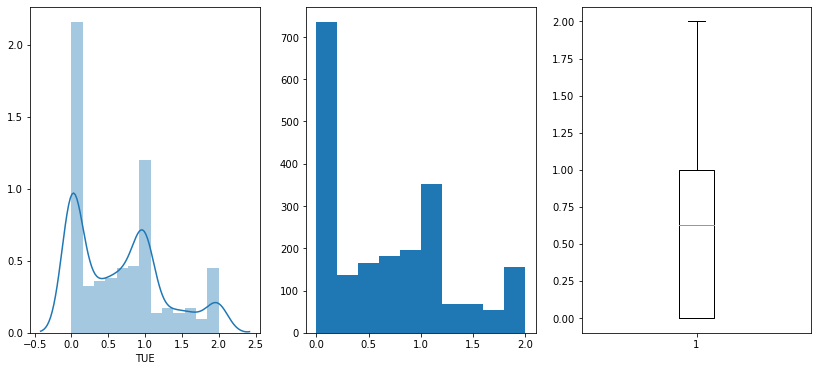


============================= Variable bmi: ==============================
Central Tendency:
count    2111.000000
mean       29.700159
std         8.011337
min        12.998685
25%        24.325802
50%        28.719089
75%        36.016501
max        50.811753
Name: bmi, dtype: float64
Mean: 29.700158778414636
Mode: 26.672763298277697
Median: 28.71908906003529

Measure of dispersion:
Range: 37.813067915939726
Quartile Q1, Q2, Q3: [24.325801842254698, 28.71908906003529, 36.016500828081696]
IQR = Q3 - Q1 =  11.690698985826998
Variance: 64.15
Standard Deviation: 8.01
Skewness: 0.15
Kurtosis: -0.81


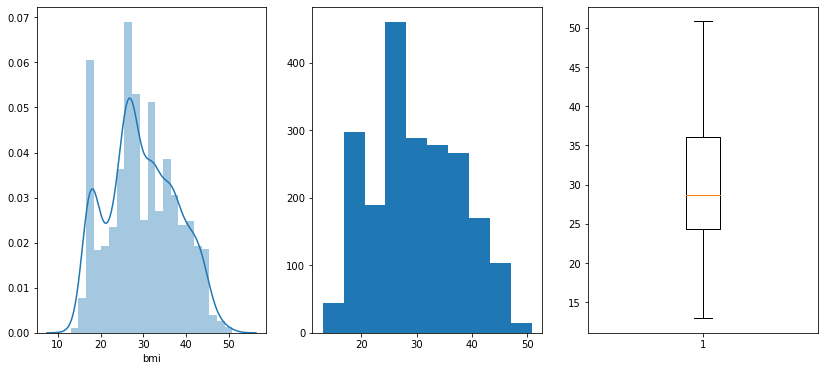

In [13]:
# lst = ['luong_xe', 'width','width_sos', 'lane1', 'lane_sum', 'X12','y']
# var = df.drop(lst, axis=1)
for i in df[numbers]:
    cont_var(df[i])

## 3. Phân tích hai biến
#### Continuous & Continuous: 

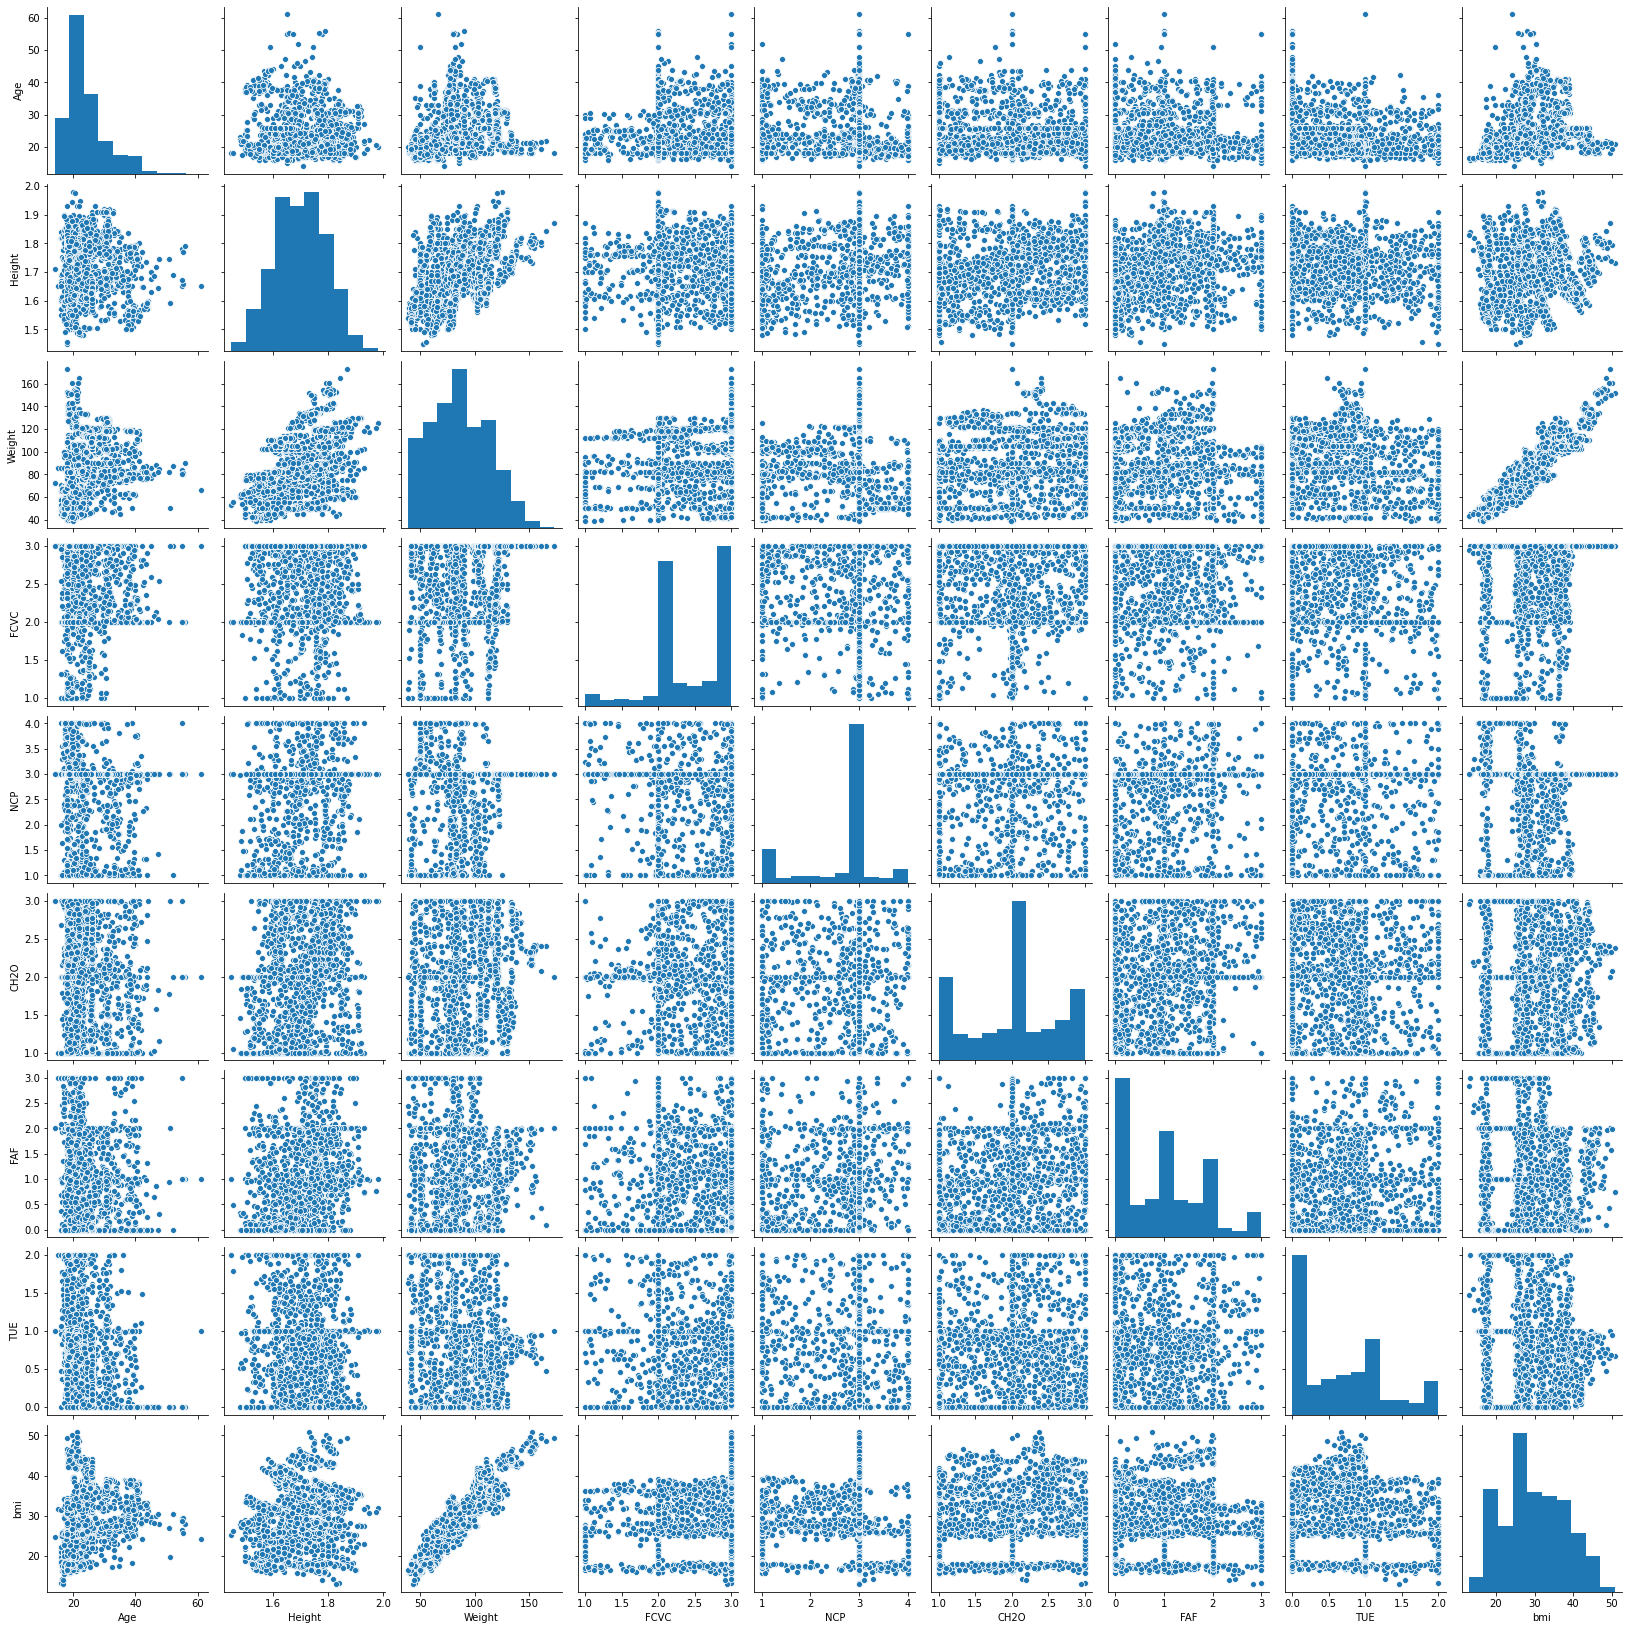

In [14]:
sns.pairplot(df[numbers])

sns.pairplot(df[objects])

In [15]:
df.corr()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,bmi
Age,1.000000,-0.025958,0.202560,0.016291,-0.043944,-0.045304,-0.144938,-0.296931,0.244163
Height,-0.025958,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912,0.131785
Weight,0.202560,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561,0.934806
FCVC,0.016291,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135,0.263651
NCP,-0.043944,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326,0.039969
CH2O,-0.045304,0.213376,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965,0.144200
FAF,-0.144938,0.294709,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562,-0.177537
TUE,-0.296931,0.051912,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000,-0.099720
bmi,0.244163,0.131785,0.934806,0.263651,0.039969,0.144200,-0.177537,-0.099720,1.000000


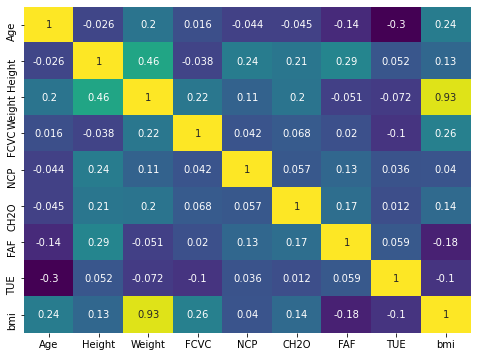

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap='viridis',annot=True,cbar=False)

## 4. Xử lý dữ liệu thiếu

In [17]:
# Handle the Missing Values
# Handle Outlier Values

df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
bmi                               0
dtype: int64

Nhận xét: Không có dữ liệu thiếu

## 5. Phát hiện và xử lý ngoại lệ

In [18]:
# Xử lý outliers:
def xuly_0utlier (df, col):
    ''' Tính toán số lượng upper/ lower outliers theo phương pháp IQR'''
    Q1 = np.percentile(col, 25)
    Q3 = np.percentile(col, 75)
    IQR = stats.iqr(col)
    
    upper = df[col > (Q3 + 1.5* IQR)].shape[0]
    lower = df[col < (Q1 - 1.5* IQR)].shape[0]
    print('\n============================= Variable %s: ==============================' %col.name)

    print('Q1: ', Q1)
    print('Q3: ', Q3)
    print('IQR: ', IQR)
    print('Số lượng upper outliers là:', upper)
    print('Số lượng lower outliers là:', lower)
    print('Phần trăm số lượng outliers so với tập là: %.3f' %((upper + lower)/df.shape[0]))
    plt.boxplot(col)
    plt.show()

In [19]:
# for i in df:
#     xuly_0utlier(df, df[i])

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Linear Regression
### Simple Linear Regression

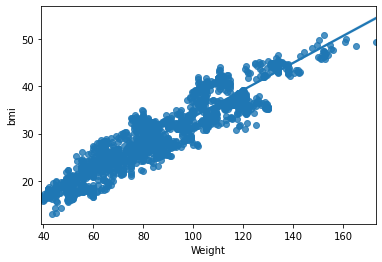

In [21]:
sns.regplot(data= df, x='Weight', y='bmi')
plt.show()

In [22]:
inputs = df[['Weight']]
outputs = df['bmi']
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size = 0.2, random_state = 42)
regr1 = LinearRegression()
regr1 = regr1.fit(X_train, y_train)
regr1.score(X_train, y_train)

0.8734783739753391

In [23]:
regr1.score(X_test, y_test)

0.8753319091724543

### Multiple Linear Regression

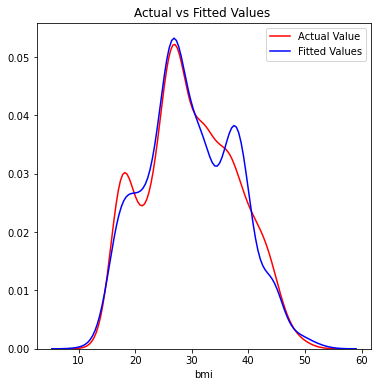

In [24]:
# lst = ['luong_xe', 'width','width_sos', 'lane1', 'lane2', 'lane_sum','X11','X12', 'X13','y']
# X predictors: X1=duong_dai, X2=xe_tai, X4=max_speed, X9=entry_route
X1 = df[['Age', 'Weight', 'Height', 'FCVC']]
Y1 = df['bmi']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size = 0.2, random_state = 0)

lm1 = LinearRegression()
lm1.fit(X1_train, y1_train)
yhat1 = lm1.predict(X1_train)

plt.figure(figsize=(6,6))
ax1 = sns.distplot(y1_train, hist=False, color="r", label="Actual Value")
sns.distplot(yhat1, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values ')
# plt.xlabel('')
# plt.ylabel('')

plt.show()
plt.close()

In [25]:
# Find the R^2
print('The train set R-square is: ', lm1.score(X1_train, y1_train))
print('The test set R-square is: ', lm1.score(X1_test, y1_test))

The train set R-square is:  0.9892813148346453
The test set R-square is:  0.9902149610157687


## PCA

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(.99)

In [28]:
lst1=['bmi']
X_pca = df.drop(lst1, axis=1)

In [29]:
X_pca = pd.get_dummies(X_pca)

In [30]:
X_pca

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,1,0,...,0,1,0,0,1,0,0,0,0,0
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,1,0,...,0,1,0,0,1,0,0,0,0,0
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,0,1,...,0,1,0,0,1,0,0,0,0,0
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,0,1,...,0,0,1,0,0,0,0,0,1,0
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,0,1,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,1,0,...,0,1,0,0,0,0,0,1,0,0
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,1,0,...,0,1,0,0,0,0,0,1,0,0
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,1,0,...,0,1,0,0,0,0,0,1,0,0
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,1,0,...,0,1,0,0,0,0,0,1,0,0


In [31]:
pca.fit(X_pca)
print(pca.n_components_)

2


[0.94029439 0.05291886]
0.9932132461686042


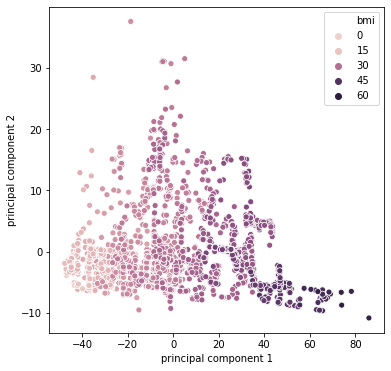

In [32]:
pca2d = PCA(2)
pca2d.fit(X_pca)
B1 = pca2d.transform(X_pca)
print(pca2d.explained_variance_ratio_)
print(sum(pca2d.explained_variance_ratio_))
principalDf = pd.DataFrame(data = B1,
                           columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['bmi']]], axis = 1)
plt.figure(figsize=(6,6))
sns.scatterplot(x="principal component 1",y="principal component 2",data=finalDf,hue="bmi")
plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
X11 = X_pca
Y11 = df['bmi']
X11_train, X11_test, y11_train, y11_test = train_test_split(X11, Y11, test_size = 0.2, random_state = 42)

In [35]:
scaler.fit(X11_train)
X11_train = scaler.transform(X11_train)
X11_test = scaler.transform(X11_test)
pca = PCA(2)
pca.fit(X11_train)
# Fit PCA on training set. Note: you are fitting PCA on the training set only.

PCA(n_components=2)

In [36]:
pca.n_components_

2

In [37]:
X11_train = pca.transform(X11_train)
X11_test = pca.transform(X11_test)
regr11 = LinearRegression()
regr11 = regr11.fit(X11_train, y11_train)
regr11.score(X11_train, y11_train)

0.6514891616680399

In [38]:
regr11.score(X11_test, y11_test)

0.6719254735821754

## PCA w multiple vars

In [39]:
# lst = ['luong_xe', 'width','width_sos', 'lane1', 'lane2', 'lane_sum','X11','X12', 'X13','y']
X11_ = X_pca
Y11_ = df['bmi']
X11__train, X11__test, y11__train, y11__test = train_test_split(X11_, Y11_, test_size = 0.2, random_state = 0)
scaler1_ = StandardScaler()
scaler1_.fit(X11__train)

StandardScaler()

In [40]:
X11__train = scaler.transform(X11__train)
X11__test = scaler.transform(X11__test)
pca = PCA(.50)
pca.fit(X11__train)

PCA(n_components=0.5)

In [41]:
pca.n_components_

8

In [42]:
regr11_ = LinearRegression()
regr11_ = regr11_.fit(X11__train, y11__train)
regr11_.score(X11__train, y11__train)

0.9949011684490717

In [43]:
regr11_.score(X11__test, y11__test)

0.9951092055182127

In [44]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results


In [45]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(8, 4))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 6.997238186730562e-10
Residuals are not normally distributed


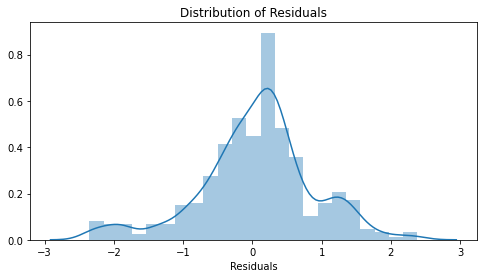


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [50]:
normal_errors_assumption(lm1, X1_test, y1_test)

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.00036350230761262377
Residuals are not normally distributed


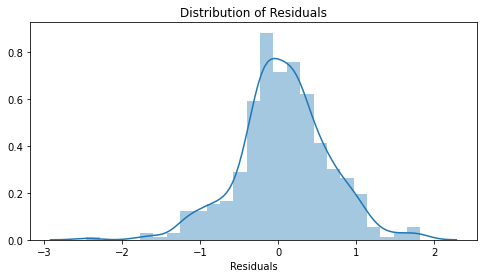


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [51]:
normal_errors_assumption(regr11_, X11__test, y11__test)

In [ ]:
# https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/